In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
#importing data from ccpd dataset,the data is presented in 5 different excel sheets
ccpd_sheet_all = pd.read_excel('ccpd_data.xlsx', sheet_name=None)

In [3]:
ccpd_sheet_all['Sheet5'].head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [4]:
#Concatnating the data from all sheets
ccpd_df = ccpd_sheet_all['Sheet5']

In [5]:
#displaying the ghead of CCPD data frame.
ccpd_df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [6]:
#Displaying the shape of the data frame.
ccpd_df.shape

(9568, 5)

In [7]:
#There are no missing values.Hence, data pre processing is not required. 
ccpd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [8]:
ccpd_df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


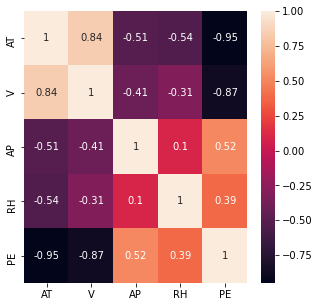

In [9]:
# correlation map-AS this requires a multivariante analysis a correlation map is used to find the co efficient values between the variables.
plt.figure(figsize=(5,5))
sns.heatmap(ccpd_df.corr(), annot=True)
plt.show()

In [10]:
X1 = ccpd_df.iloc[:, 0:4].values # We chose AT,V,AP,RH
y1 = ccpd_df.iloc[:, -1].values # PE


In [11]:
print(X1.shape)
print(y1.shape)

(9568, 4)
(9568,)


In [12]:
#splitting the data into train and test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)
# Training the Simple Linear Regression model on the Training set
regressor = LinearRegression()
regressor.fit(X1_train, y1_train)
y1_pred = regressor.predict(X1_test) 
y1_pred

array([433.36241603, 448.38864548, 445.88661799, ..., 456.06061126,
       446.91190634, 432.57326179])

In [45]:

print("-----------------------------------------------------------------")
print(" r2_score (r2) ="+str(r2_score(y1_test,y1_pred)))
print("-----------------------------------------------------------------")
print(" PE mean absolute error (mae) = "+ str(mean_absolute_error(y1_test,y1_pred)))
print("-----------------------------------------------------------------")
print(" PE mean squared error (mse) = "+ str(mean_squared_error(y1_test,y1_pred)))
print("-----------------------------------------------------------------")
print(" PE root mean squared error (rmse) = "+ str(np.sqrt(mean_squared_error(y1_test,y1_pred))))
print("-----------------------------------------------------------------")

-----------------------------------------------------------------
 r2_score (r2) =0.9298994694436788
-----------------------------------------------------------------
 PE mean absolute error (mae) = 3.6304576576331415
-----------------------------------------------------------------
 PE mean squared error (mse) = 20.218249777037922
-----------------------------------------------------------------
 PE root mean squared error (rmse) = 4.496470813542318
-----------------------------------------------------------------


In [46]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)
# Training the Random Forest Regression model on the whole dataset
#As random forest regressor got a major problem as exploration. but in here we are trying to get the optimal model for max PE .so it's fine as
#long as it predicts the values within the data set.
#which means this model gives the best prediction for net hourly electrical energy output (PE) of the plant.
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)    
regressor.fit(X2_train, y2_train)
y2_pred = regressor.predict(X2_test)
y2_pred

array([431.769, 448.615, 441.103, ..., 454.333, 446.423, 435.719])

In [47]:

print("-----------------------------------------------------------------")
print(" r2_score (r2) ="+str(r2_score(y2_test,y2_pred)))
print("-----------------------------------------------------------------")
print(" PE mean absolute error (mae) = "+ str(mean_absolute_error(y2_test,y2_pred)))
print("-----------------------------------------------------------------")
print(" PE mean squared error (mse) = "+ str(mean_squared_error(y2_test,y2_pred)))
print("-----------------------------------------------------------------")
print(" PE root mean squared error (rmse) = "+ str(np.sqrt(mean_squared_error(y2_test,y2_pred))))
print("-----------------------------------------------------------------")

-----------------------------------------------------------------
 r2_score (r2) =0.9600247281286117
-----------------------------------------------------------------
 PE mean absolute error (mae) = 2.4770752351097194
-----------------------------------------------------------------
 PE mean squared error (mse) = 11.529585085684433
-----------------------------------------------------------------
 PE root mean squared error (rmse) = 3.395524272580662
-----------------------------------------------------------------


In [16]:
y2_test

array([426.18, 451.1 , 442.87, ..., 454.2 , 444.13, 436.58])

In [17]:
print(np.concatenate
      ((y2_pred.reshape(len(y2_pred),1), y2_test.reshape(len(y2_test),1)),
       axis=1))

[[431.769 426.18 ]
 [448.615 451.1  ]
 [441.103 442.87 ]
 ...
 [454.333 454.2  ]
 [446.423 444.13 ]
 [435.719 436.58 ]]


<AxesSubplot:>

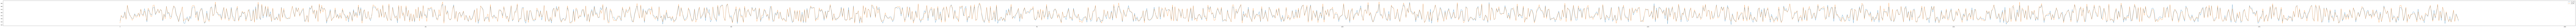

In [18]:
# Data
ccpd_line=pd.DataFrame({'y1_pred': y1_pred,'y1_test': y1_test})
 
# show graph
ccpd_line.plot(figsize=(500,5))

<AxesSubplot:>

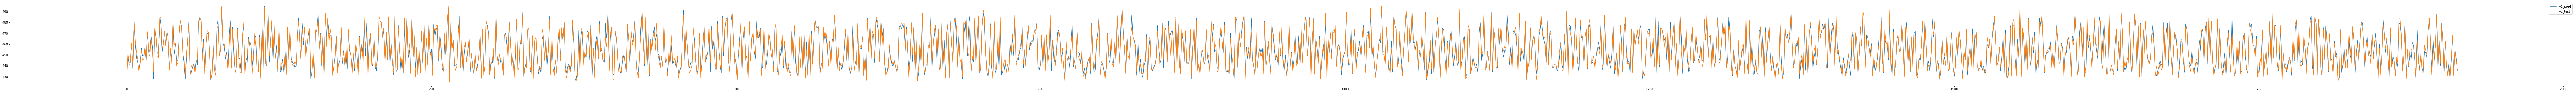

In [19]:
# Data
ccpd_line=pd.DataFrame({'y2_pred': y2_pred,'y2_test': y2_test})
 
# show graph
ccpd_line.plot(figsize=(150,5))

<AxesSubplot:xlabel='RF-Reg Predictions', ylabel='Actual Values'>

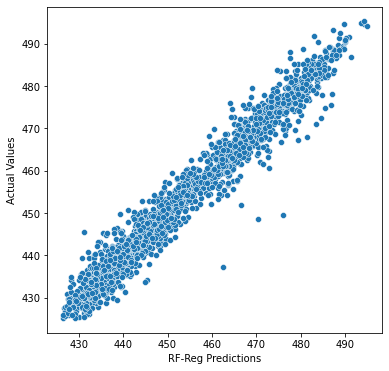

In [20]:

plt.figure(figsize=(6,6))
plt.xlabel('RF-Reg Predictions')
plt.ylabel('Actual Values')
sns.scatterplot(x=y2_pred,y=y2_test)

#print("best params=");print(svob.best_params_)

<AxesSubplot:xlabel='Linear Predictions', ylabel='Actual Values'>

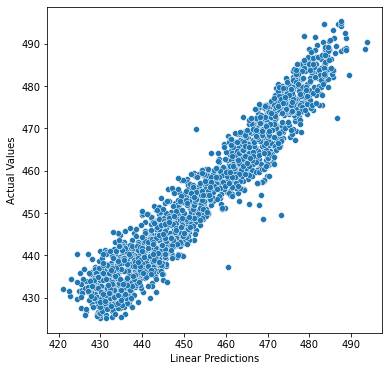

In [21]:
plt.figure(figsize=(6,6))
plt.xlabel('Linear Predictions')
plt.ylabel('Actual Values')
sns.scatterplot(x=y1_pred,y=y1_test)


In [22]:
#splitting the data into train and test
X3_train, X3_test, y3_train, y3_test = train_test_split(X1, y1, test_size = 0.20, random_state = 42)
# Training the Simple Linear Regression model on the Training set
regressor = LinearRegression()
regressor.fit(X3_train, y3_train)
y3_pred = regressor.predict(X3_test) 
y3_pred

array([435.92761534, 437.49184874, 461.35079992, ..., 467.9111589 ,
       431.71862803, 456.64616705])

In [23]:

print("-----------------------------------------------------------------")
print(" r2_score (r2) ="+str(r2_score(y3_test,y3_pred)))
print("-----------------------------------------------------------------")
print(" PE mean absolute error (mae) = "+ str(mean_absolute_error(y3_test,y3_pred)))
print("-----------------------------------------------------------------")
print(" PE mean squared error (mse) = "+ str(mean_squared_error(y3_test,y3_pred)))
print("-----------------------------------------------------------------")
print(" PE root mean squared error (rmse) = "+ str(np.sqrt(mean_squared_error(y3_test,y3_pred))))
print("-----------------------------------------------------------------")

-----------------------------------------------------------------
 r2_score (r2) =0.9314747936670361
-----------------------------------------------------------------
 PE mean absolute error (mae) = 3.543448497079016
-----------------------------------------------------------------
 PE mean squared error (mse) = 19.60808532568382
-----------------------------------------------------------------
 PE root mean squared error (rmse) = 4.428101774539946
-----------------------------------------------------------------


In [38]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X1, y1, test_size = 0.20, random_state = 42)
# Training the Random Forest Regression model on the whole dataset
#As random forest regressor got a major problem as exploration. but in here we are trying to get the optimal model for max PE .so it's fine as
#long as it predicts the values within the data set.
#which means this model gives the best prediction for net hourly electrical energy output (PE) of the plant.
regressor = RandomForestRegressor(n_estimators = 10, random_state = 42)    
regressor.fit(X4_train, y4_train)
y4_pred = regressor.predict(X4_test)
y4_pred

array([436.497, 434.465, 458.896, ..., 467.787, 434.905, 457.197])

In [39]:

print("-----------------------------------------------------------------")
print(" r2_score (r2) ="+str(r2_score(y4_test,y4_pred)))
print("-----------------------------------------------------------------")
print(" PE mean absolute error (mae) = "+ str(mean_absolute_error(y4_test,y4_pred)))
print("-----------------------------------------------------------------")
print(" PE mean squared error (mse) = "+ str(mean_squared_error(y4_test,y4_pred)))
print("-----------------------------------------------------------------")
print(" PE root mean squared error (rmse) = "+ str(np.sqrt(mean_squared_error(y4_test,y4_pred))))
print("-----------------------------------------------------------------")

-----------------------------------------------------------------
 r2_score (r2) =0.9601522979141031
-----------------------------------------------------------------
 PE mean absolute error (mae) = 2.420851097178685
-----------------------------------------------------------------
 PE mean squared error (mse) = 11.40218591588297
-----------------------------------------------------------------
 PE root mean squared error (rmse) = 3.3767122939159284
-----------------------------------------------------------------


In [26]:

print("-----------------------------------------------------------------")
print(" r2_score (r2) ="+str(r2_score(y2_test,y2_pred)))
print("-----------------------------------------------------------------")
print(" PE mean absolute error (mae) = "+ str(mean_absolute_error(y2_test,y2_pred)))
print("-----------------------------------------------------------------")
print(" PE mean squared error (mse) = "+ str(mean_squared_error(y2_test,y2_pred)))
print("-----------------------------------------------------------------")
print(" PE root mean squared error (rmse) = "+ str(np.sqrt(mean_squared_error(y2_test,y2_pred))))
print("-----------------------------------------------------------------")

-----------------------------------------------------------------
 r2_score (r2) =0.9600247281286117
-----------------------------------------------------------------
 PE mean absolute error (mae) = 2.4770752351097194
-----------------------------------------------------------------
 PE mean squared error (mse) = 11.529585085684433
-----------------------------------------------------------------
 PE root mean squared error (rmse) = 3.395524272580662
-----------------------------------------------------------------


In [27]:
pip install fairlearn

Note: you may need to restart the kernel to use updated packages.


In [28]:
from fairlearn.reductions import SquareLoss, AbsoluteLoss, ZeroOneLoss
y_true = [0,   0.3, 1,   0.9]
y_pred = [0.1, 0.2, 0.9, 1.3]
print(SquareLoss(0, 2).eval(y_true, y_pred))
# clipping at 1 reduces the error for the fourth entry
print('SquareLoss(0, 1).eval(y_true, y_pred)' + str(SquareLoss(0, 1).eval(y_true, y_pred)))

print(AbsoluteLoss(0, 2).eval(y_true, y_pred))
print(AbsoluteLoss(0, 1).eval(y_true, y_pred))
# ZeroOneLoss is identical to AbsoluteLoss(0, 1)
print(ZeroOneLoss().eval(y_true, y_pred))


[0.01 0.01 0.01 0.16]
SquareLoss(0, 1).eval(y_true, y_pred)[0.01 0.01 0.01 0.01]
[0.1 0.1 0.1 0.4]
[0.1 0.1 0.1 0.1]
[0.1 0.1 0.1 0.1]


In [43]:
print(AbsoluteLoss(420,468).eval(y4_test, y4_pred))


[3.227 3.695 0.476 ... 0.013 2.235 0.417]


In [41]:
print(AbsoluteLoss(420,495).eval(y4_test, y4_pred))


[3.227 3.695 0.476 ... 0.013 2.235 0.417]


In [30]:
kk=SquareLoss(420,495).eval(y4_test, y4_pred)
print(kk)


[12.72277561  9.67583236  0.01404225 ...  0.46212804  8.76515236
  0.065025  ]


In [31]:
print(ZeroOneLoss().eval(y4_test, y4_pred))


[0. 0. 0. ... 0. 0. 0.]


In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  

# the independent variables set
X12 = ccpd_df[['AT', 'V', 'AP','RH']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X12.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X12.values, i)
                          for i in range(len(X12.columns))]
  
print(vif_data)

  feature        VIF
0      AT  39.157705
1       V  74.969127
2      AP  66.618618
3      RH  40.704756


In [33]:
X4_train

array([[  25.24,   63.47, 1011.3 ,   66.21],
       [  26.09,   70.4 , 1007.41,   85.37],
       [  26.63,   73.68, 1015.15,   85.13],
       ...,
       [  18.  ,   43.7 , 1015.4 ,   61.28],
       [  26.73,   68.84, 1010.75,   66.83],
       [   6.4 ,   39.18, 1024.6 ,   86.83]])

In [34]:

df12 = pd.DataFrame(X4_train, columns =['AT', 'V', 'AP','RH'])
print("\nPandas DataFrame: ")
print(df12)


Pandas DataFrame: 
         AT      V       AP     RH
0     25.24  63.47  1011.30  66.21
1     26.09  70.40  1007.41  85.37
2     26.63  73.68  1015.15  85.13
3     32.06  71.85  1007.90  56.44
4     28.70  71.64  1007.11  69.85
...     ...    ...      ...    ...
7649  26.25  61.02  1011.47  71.22
7650  29.17  64.79  1016.43  61.05
7651  18.00  43.70  1015.40  61.28
7652  26.73  68.84  1010.75  66.83
7653   6.40  39.18  1024.60  86.83

[7654 rows x 4 columns]


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  

# the independent variables set
X12 = df12[['AT', 'V', 'AP','RH']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X12.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X12.values, i)
                          for i in range(len(X12.columns))]
  
print(vif_data)

  feature        VIF
0      AT  39.261452
1       V  75.316744
2      AP  67.211873
3      RH  41.205264


In [36]:
import statsmodels.api as sm

#Model statistics
#Must add constant for y-intercept
model = sm.OLS(y4_train, sm.add_constant(X4_train)).fit()
Y_pred12 = model.predict(sm.add_constant(X4_test))
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.464e+04
Date:                Wed, 04 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:22:27   Log-Likelihood:                -22523.
No. Observations:                7654   AIC:                         4.506e+04
Df Residuals:                    7649   BIC:                         4.509e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        458.5962     11.037     41.549      0.0